# **C3 - Laboratorio Reconocimiento de patrones II**

**Autores:**  

* Esteban Rodriguez
* Daniel Velasquez
* Santiago Niño

Ciencias de la computación e Inteligencia Artificial


Vida Artificial

# __Bibliotecas usadas__

In [1]:
#from numba import njit

In [2]:
try:
    import IPython
    import numpy as np
    import random
    import matplotlib.pyplot as plt
    import os
    import requests
    import time
    import platform
    import psutil
    from PIL import Image
    from IPython.display import HTML
    from matplotlib.animation import FuncAnimation
    from IPython import display
    import concurrent.futures
    #from numba import njit


except ImportError:
    %pip install IPython
    %pip install numpy
    %pip install matplotlib
    %pip install requests
    %pip install psutil
    %pip install PIL
    %pip install numba
    
    import numpy as np
    import random
    import matplotlib.pyplot as plt
    import os
    import requests
    import time
    import platform
    import psutil
    from PIL import Image
    from IPython.display import HTML
    from matplotlib.animation import FuncAnimation
    from IPython import display
    import concurrent.futures
    #from numba import njit


# Enunciado

Tome una foto de todos los miembros del grupo. La foto debe tener mínimo una resolución HD (720 X 1280 pixeles).

- Convierta la imagen en un arreglo unidimensional (Considere los 3 canales)

- Utilice su implementación de GA para generar la imagen y realice una animación que permita ver el proceso de generación del patrón.

- En 3 diapositivas, incluya:

1. Gráfica de fitness generada durante el proceso de entrenamiento. Tiempo de ejecución y características de la máquina donde se ejecutó el experimento.

2. Los diferentes operadores genéticos utilizados.

3. Mencione si realizó ajustes sobre hiperparámetros como la probabilidad de mutación, porcentaje de elitismo, criterio de parada etc.

# Clases

## Constantes

In [3]:
class constantes:
    num_generaciones = 2000
    factor = 15
    prob_cruce = 0.99
    prob_mutacion = 0.01
    porc_elitismo = 0
    seleccion = "ranking"
    cruce = "uniforme"
    mutacion = "flit_bit"
    carpetaGrupo = "C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatronesII\\archivosGrupo"
    resize = 600
    shape = (810, 1080)

## Individuo

In [4]:
class individuo:
    def __init__(self, cromosoma, fitness):
        self._cromosoma = cromosoma
        self.fitness = fitness
        self.value = self._calculate_fitness(self._cromosoma)

    def _calculate_fitness(self, value):
        return self.fitness(value)

    @property
    def cromosoma(self):
        return self._cromosoma

    @cromosoma.setter
    def cromosoma(self, value):
        self._cromosoma = value
        self.value = self._calculate_fitness(value)

## OperadorGenetico

In [5]:
class OperadorGenetico:
    def __init__(self, poblacion, tipo, prob_cruce=0.5, prob_mutacion=0.5):
      self.poblacion = poblacion
      self.tipo = tipo
      self.prob_cruce = prob_cruce
      self.prob_mutacion = prob_mutacion

    #@staticmethod
    #@njit
    def seleccion(self):
      # Normal
      if self.tipo == "ranking":
        #ordenando = np.argsort([indiv.value for indiv in self.poblacion]) + 1
        #rangos = np.argsort(ordenando) + 1
        #seleccion_rango = rangos / np.sum(rangos)
        # Utiliza numpy para realizar la selección de manera más eficiente
        #indices_seleccionados = np.random.choice(len(self.poblacion), size=len(self.poblacion), replace=True, p=seleccion_rango)
        #next_generation = [self.poblacion[i] for i in indices_seleccionados]
        #return next_generation
      
        # Paralelo
        ordenando = np.argsort([indiv.value for indiv in self.poblacion]) + 1
        rangos = np.argsort(ordenando) + 1
        seleccion_rango = rangos / np.sum(rangos)
        # Definir una función para la selección en paralelo
        def seleccion_individual(i):
            return np.random.choice(len(self.poblacion), p=seleccion_rango)
        # Utilizar concurrent.futures para paralelizar la selección
        with concurrent.futures.ThreadPoolExecutor() as executor:
            indices_seleccionados = list(executor.map(seleccion_individual, range(len(self.poblacion))))
        next_generation = [self.poblacion[i] for i in indices_seleccionados]
        
        return next_generation
    # Normal
    def cruce(self):
      if self.tipo == 'uniforme':
        next_generation = []
        while len(next_generation) < len(self.poblacion):
            x, y = np.random.randint(len(self.poblacion), size=2)
            padre1, padre2 = self.poblacion[x].cromosoma, self.poblacion[y].cromosoma

            # Generar el hijo usando operaciones de NumPy
            mask = np.random.randint(2, size=len(padre1))
            hijo = np.where(mask == 0, padre1, padre2)

            next_generation.append(individuo(hijo, self.poblacion[x].fitness))
        return next_generation
    def cruce(self):
      if self.tipo == 'uniforme':
          next_generation = []
          with concurrent.futures.ThreadPoolExecutor() as executor:
              futures = [executor.submit(self.cruce_un_hijo) for _ in range(len(self.poblacion))]
              for future in futures:
                  next_generation.append(future.result())
          return next_generation

    def cruce_un_hijo(self):
        x, y = np.random.randint(len(self.poblacion), size=2)
        padre1, padre2 = self.poblacion[x].cromosoma, self.poblacion[y].cromosoma

        # Generar el hijo usando operaciones de NumPy
        mask = np.random.randint(2, size=len(padre1))
        hijo = np.where(mask == 0, padre1, padre2)

        return individuo(hijo, self.poblacion[x].fitness)

    def mutacion(self):
      if self.tipo == 'flit_bit':
        for individuo in self.poblacion:
          if np.random.rand() <= self.prob_mutacion:
              n = np.random.randint(0, len(individuo.cromosoma))
              individuo.cromosoma[n] = 1 if individuo.cromosoma[n] == 0 else 0
        return self.poblacion

## Analisis Descriptivo

In [6]:
class AnalisisDescriptivo:
    def promedio(poblacion):
      my_array = np.array([])
      for individuo in poblacion.list_individuos:
        my_array = np.append(my_array, individuo.fitness)
      return np.mean(my_array)

    def tiempo_ejecucion(inicio_tiempo):
      fin_tiempo = time.time()  # Tiempo final
      tiempo_ejec = fin_tiempo - inicio_tiempo  # Calcular el tiempo de ejecución
      return tiempo_ejec

    def total_tiempo_ejecucion(inicio_tiempo, tiempos):
      tiempo_ejec = tiempos[-1] - tiempos[0]
      print("\nTiempo total de ejecucion:")
      print(f" {tiempo_ejec} segundos")
      print(f" {tiempo_ejec / 60} minutos")

    def extraer_datos_pc():
      # Obtener información del sistema
      sistema = platform.system()
      version = platform.version()
      arquitectura = platform.architecture()
      procesador = platform.processor()
      # Obtener información sobre la memoria
      memoria = psutil.virtual_memory()

      # Imprimir la información
      print("\nInformación del computador:")
      print(f" Sistema: {sistema}")
      print(f" Versión: {version}")
      print(f" Arquitectura: {arquitectura}")
      print(f" Procesador: {procesador}")
      print(f" Memoria Total: {memoria.total} bytes")
      print(f" Memoria Disponible: {memoria.available} bytes")
      print(f" Porcentaje de Uso de Memoria: {memoria.percent}%")

    def mostrarAnalisis(poblacion):
      my_array = [indi.value for indi in poblacion]

      print("Datos estadisticos:")
      print(" Media:", np.mean(my_array))
      print(" Mediana:", np.median(my_array))
      print(" Mínimo:", np.min(my_array))
      print(" Máximo:", np.max(my_array))
      print(" Desviación estándar:", np.std(my_array))
      print(" Varianza:", np.var(my_array))

    def mejor_individuo(poblacion):
      indi = poblacion[0]
      for i in poblacion:
          if i.value > indi.value:
              indi = i
      return indi

    def peor_individuo(poblacion):
      indi = poblacion[0]
      for i in poblacion:
          if i.value < indi.value:
              indi = i
      return indi

    def promedio_por_generacion(poblacion):
      return np.average([inv.value for inv in poblacion])


## Visualizacion

In [7]:
class Visualizacion():
  def fitnessPromVSgeneracion(prom_por_generacion):
    plt.title("Promedio fitness por generacion")
    plt.plot(range(len(prom_por_generacion)), prom_por_generacion)
    plt.xlabel("Generación")
    plt.ylabel("Promedio de Fitness")
    plt.savefig(carpeta + '\\Grafica_fitnessVSgeneracion.png')
    plt.show()

  def tiempoVSgeneracion(tiempos):
    minutos = [tiempo / 60 for tiempo in tiempos]
    plt.title("Tiempo (min) vs Generacion")
    plt.plot(range(len(tiempos)), minutos)
    plt.xlabel("Generación")
    plt.ylabel("Tiempo (min)")
    plt.savefig(carpeta + '\\Grafica_tiempoVSgeneracion.png')
    plt.show()

## Algoritmo Genetico

In [8]:
class AlgGenetico:
    def __init__(self, poblacion, num_generaciones, seleccion, cruce, mutacion,
                 prob_cruce=constantes.prob_cruce, prob_mutacion=constantes.prob_mutacion, distribucion_elite=constantes.porc_elitismo):
      self.poblacion = poblacion
      self.num_generaciones = num_generaciones
      self.seleccion = seleccion
      self.cruce = cruce
      self.mutacion = mutacion
      self.prob_cruce = prob_cruce
      self.prob_mutacion = prob_mutacion
      self.distribucion_elite = distribucion_elite
      self.promXgeneracion = []
      self.tiempos = []
      self.inicio_tiempo = None
      self.mejorIndividuoXgeneracion = []

    def mejor_individuo(self, poblacion):
      return AnalisisDescriptivo.mejor_individuo(poblacion)

    def extraer_tiempo(self):
      return AnalisisDescriptivo.tiempo_ejecucion(self.inicio_tiempo)

    def seleccion_top(self, poblacion):
      sort_poblacion = sorted(poblacion, key=lambda x: x.value, reverse=True)
      elite_size = int(len(poblacion) * self.distribution_elite)
      elite = sort_poblacion[:elite_size]
      otros = sort_poblacion[elite_size:]
      return elite, otros

    def actualizar_listas(self, poblacionActual):
      self.promXgeneracion.append( AnalisisDescriptivo.promedio_por_generacion(poblacionActual) )
      self.tiempos.append(self.extraer_tiempo())
      self.mejorIndividuoXgeneracion.append( self.mejor_individuo(poblacionActual).cromosoma )

    def desarrollo_generaciones(self):
      poblacionActual, elite = self.poblacion, []
      # Establece el tiempo inicial
      self.inicio_tiempo = time.time()
      for i in range(self.num_generaciones):
          if self.distribucion_elite > 0:
              elite, otros = self.seleccion_top(poblacionActual)
              poblacionActual = otros
              elite = elite
          print("Generacion: ", i+1)
          #Seleccion
          seleccionPob = OperadorGenetico(poblacionActual, tipo=self.seleccion).seleccion()
          #Cruce
          crucePob = OperadorGenetico(seleccionPob, tipo=self.cruce, prob_cruce=self.prob_cruce).cruce()
          #Mutacion
          mutacionPob = OperadorGenetico(crucePob, tipo=self.mutacion, prob_cruce=0.99 ,prob_mutacion=self.prob_mutacion).mutacion()
          if len(elite) > 0:
              poblacionActual = [*mutacionPob,*elite]
          else:
              poblacionActual = mutacionPob
          self.actualizar_listas(poblacionActual)
      self.poblacion = poblacionActual

    def analisis_est(self):
      AnalisisDescriptivo.mostrarAnalisis(self.poblacion)
      AnalisisDescriptivo.extraer_datos_pc()
      AnalisisDescriptivo.total_tiempo_ejecucion(self.inicio_tiempo, self.tiempos)

    def diagramas(self):
      Visualizacion.fitnessPromVSgeneracion(self.promXgeneracion)
      Visualizacion.tiempoVSgeneracion(self.tiempos)

## Main

In [9]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

In [10]:
def desordenar_valores_imagen(array):
    # Desordenar los valores
    valores_desordenados = np.random.permutation(array)
    return valores_desordenados

In [11]:
def pob_init(array_base):
    poblacion_inicial = [individuo(desordenar_valores_imagen(array_base), fitness) for _ in range(1000)]
    return poblacion_inicial

In [12]:
def obt_array_matrix(img, factor):
  # Convertir la imagen a un arreglo NumPy
  matrizExp = np.array(img)
  # Convertir el arreglo a un arreglo unidimensional
  arrayExp = matrizExp.flatten() / factor
  return matrizExp, arrayExp

In [13]:
def obtener_el_mejor(exp, matrizExp):
  best_individuo = exp.poblacion[0]
  for indi in exp.poblacion:
      if indi.value > best_individuo.value:
          best_individuo = indi
  imgResultExp = best_individuo.cromosoma.reshape(matrizExp.shape)
  return imgResultExp

In [14]:
def reescalar(imgResult):
    #shape = np.array(Image.open(carpeta + '\\ImgOriginal.jpg')).shape
    #shape = (810, 1080)
    img = Image.fromarray(np.uint8(imgResult)).resize((constantes.shape[1], constantes.shape[0]))
    return np.array(img)

In [15]:
def animation_result(matrizExp, exp, frame, factor):
    matrix = np.random.randint(256, size=matrizExp.shape)
    fig, ax = plt.subplots()
    img = ax.imshow(matrix, cmap='binary')
    def update(i):
        #matrix = (exp.mejorIndividuoXgeneracion[i].reshape(matrizExp.shape) * factor) / 255.0
        matrix = reescalar(exp.mejorIndividuoXgeneracion[i].reshape(matrizExp.shape) * factor) / 255.0
        img.set_data(matrix)
        return img,
    ani = FuncAnimation(fig, update, frames=frame, interval=100, blit=True)
    return ani

# Imagenes

Obtencion de las imagenes

In [16]:
# Carpeta grupo
carpeta = constantes.carpetaGrupo

# Verificar si la carpeta ya existe
if not os.path.exists(carpeta):
    # Si no existe, la creamos
    os.mkdir(carpeta)
    
    # Imagen grupo
    url_img_1 = 'https://raw.githubusercontent.com/danieeeel11/Datasets/main/imgVidaArtificial/imagen_grupo.jpg'
    img_1 = Image.open(requests.get(url_img_1, stream=True).raw)
    img_1.save(carpeta + '\\ImgOriginal.jpg')
    
    # Dimensiones originales
    ancho_original, alto_original = img_1.size
    # Nuevo ancho deseado
    nuevo_ancho = constantes.resize
    # Calcula el nuevo alto manteniendo la proporción original
    nuevo_alto = int((nuevo_ancho / ancho_original) * alto_original)
    # Redimensiona la imagen
    img_1 = img_1.resize((nuevo_ancho, nuevo_alto))
    # Guarda la imagen redimensionada
    img_1.save(carpeta + '\\ImgRedimensionada.jpg')
else:
    # Imagen grupo
    img_1 = Image.open(carpeta + '\\ImgRedimensionada.jpg')

# Listar el contenido actual del directorio
print("Contenido de la carpeta imagenes:")
# Carpeta grupo
print(os.listdir(carpeta))

Contenido de la carpeta imagenes:
['ImgOriginal.jpg', 'ImgRedimensionada.jpg']


Imagen 1

In [17]:
np_img1 = np.array(img_1)
np_img1.shape

(450, 600, 3)

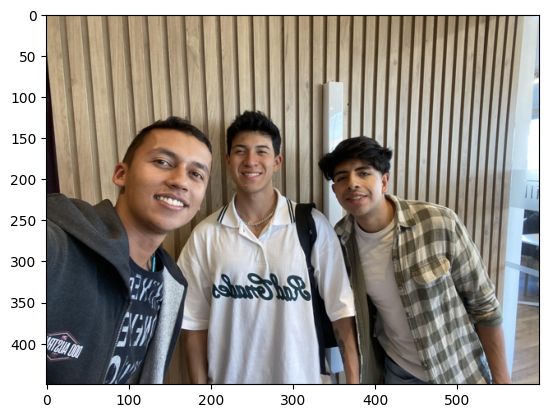

In [18]:
plt.imshow(np_img1, cmap='gray')

# Pruebas

## Primer experimento

In [19]:
# Factor de escala
factor = constantes.factor
# Numero de generaciones
generaciones = constantes.num_generaciones
# Seleccion
seleccion = constantes.seleccion
# Cruce
cruce = constantes.cruce
# Mutacion
mutacion = constantes.mutacion

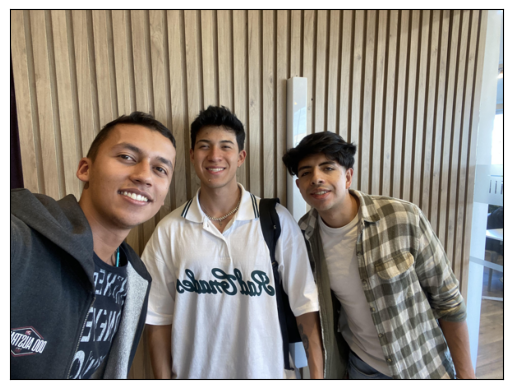

In [20]:
matrizExp1, arrayExp1 = obt_array_matrix(img_1, factor)
plt.imshow(matrizExp1, cmap='binary')
plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
def fitness(cromosoma):
    #return len(cromosoma) - 450 - euclidean_distance(arrayExp1, cromosoma)
    return len(cromosoma) - 88199 - euclidean_distance(arrayExp1, cromosoma)

In [22]:
poblacion_inicial = pob_init(arrayExp1)

Operadores Geneticos utilizados:
* Seleccion Ranking
* Cruce Uniforme
* Mutacion Flit-bit

 Hiperparámetros:
 * Probabilidad de cruce = 0.99
 * Probabilidad de mutacion = 0.01
 * Porcentaje de elitismo = 0

In [23]:
exp1 = AlgGenetico( poblacion_inicial, num_generaciones=generaciones, seleccion=seleccion, cruce=cruce, mutacion=mutacion)
exp1.desarrollo_generaciones()

Generacion:  1


In [ ]:
print("Analisis Estadistico\n")
exp1.analisis_est()

Analisis Estadistico

Datos estadisticos:
 Media: 788.9193210215882
 Mediana: 788.9183443131785
 Mínimo: 788.8156909161477
 Máximo: 788.922580914769
 Desviación estándar: 0.004562790164368716
 Varianza: 2.0819054084059895e-05

Información del computador:
 Sistema: Windows
 Versión: 10.0.19045
 Arquitectura: ('64bit', 'WindowsPE')
 Procesador: AMD64 Family 21 Model 101 Stepping 1, AuthenticAMD
 Memoria Total: 12293189632 bytes
 Memoria Disponible: 2847543296 bytes
 Porcentaje de Uso de Memoria: 76.8%

Tiempo total de ejecucion:
 6272.237019538879 segundos
 104.53728365898132 minutos


Diagramas



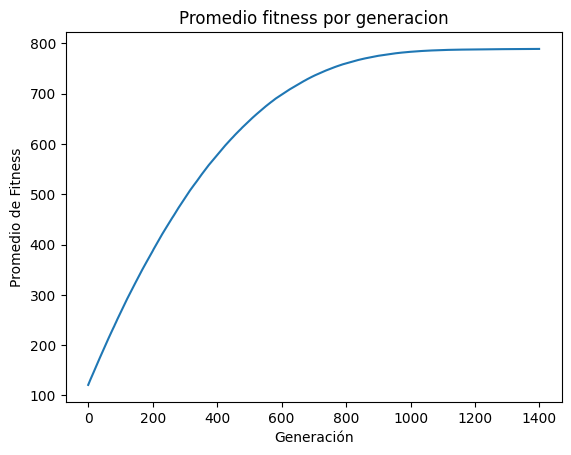

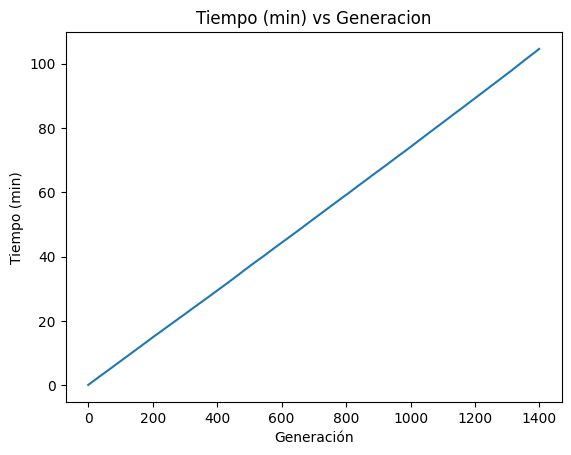

In [ ]:
print("Diagramas\n")
exp1.diagramas()

In [ ]:
imgResultExp1 = reescalar(obtener_el_mejor(exp1, matrizExp1))
# Guardar la imagen resultante
Image.fromarray(np.uint8(imgResultExp1*factor)).save(carpeta + '\\ImgResultadoFinal.jpg')
# Array adecuado para mostrar en celda
imgResult = (imgResultExp1 * factor) / 255.0

Resultado Final



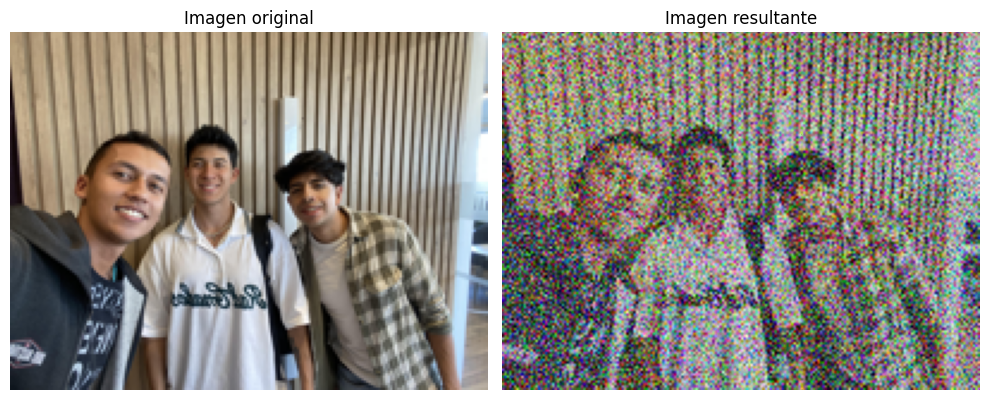

In [ ]:
print("Resultado Final\n")

plt.figure(figsize=(10, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

# Imagen resultante
plt.subplot(1, 2, 2)
plt.imshow(imgResult, cmap='binary')
plt.title('Imagen resultante')
plt.axis('off')

plt.tight_layout()
plt.savefig(carpeta + '\\GraficaComparacion.png')
plt.show()

### Animacion

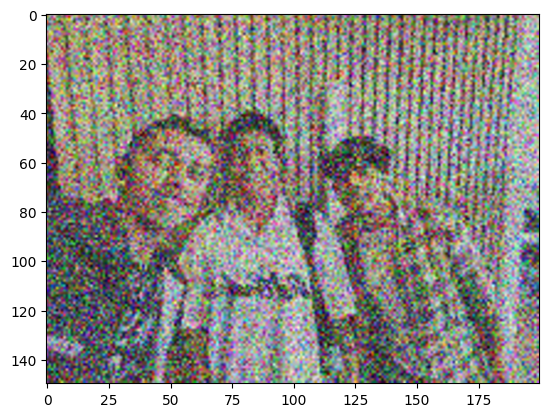

In [ ]:
ani1 = animation_result(matrizExp1, exp1, generaciones, factor)
ani1.save(carpeta + '\\Animacion.gif', writer='pillow')

In [1]:
#HTML(ani1.to_jshtml())
#display.display(display.Image(filename = carpeta + '\\Animacion.gif'))